In [1]:
# import packages
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.utils import plot_model


Using TensorFlow backend.


In [2]:
#load the data saved from data_preprocessing.py
data = np.load('data.npy')
target = np.load('target.npy')


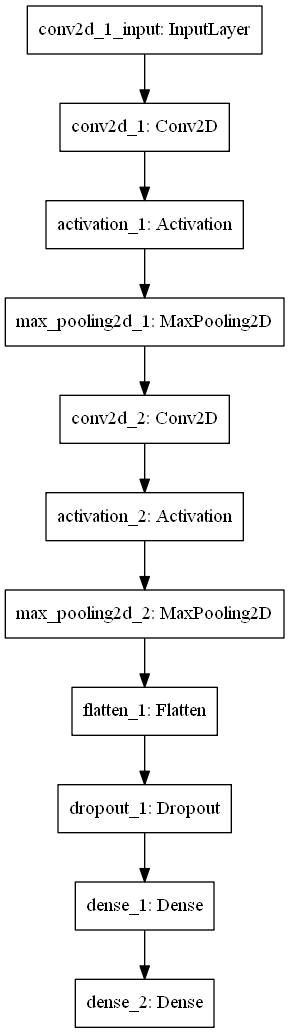

In [3]:
# initialize the model with 4 layer having 200 neuron followed by dense layer and finally to 2 output neuron since we have only 2 categories
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

plot_model(model,to_file="model.png")

In [5]:
# split the dataset into train data test data train target test target
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size = 0.1)

In [6]:
#create the check point and save the model
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode = 'auto')
history = model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)


Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 65s 65ms/step - loss: 0.7024 - accuracy: 0.4960 - val_loss: 0.6465 - val_accuracy: 0.5363
Epoch 2/20
990/990 [==============================] - 73s 74ms/step - loss: 0.5293 - accuracy: 0.7061 - val_loss: 0.3912 - val_accuracy: 0.8669
Epoch 3/20
990/990 [==============================] - 86s 87ms/step - loss: 0.3363 - accuracy: 0.8677 - val_loss: 0.2591 - val_accuracy: 0.9153
Epoch 4/20
990/990 [==============================] - 92s 92ms/step - loss: 0.2449 - accuracy: 0.9111 - val_loss: 0.1835 - val_accuracy: 0.9476
Epoch 5/20
990/990 [==============================] - 107s 109ms/step - loss: 0.1856 - accuracy: 0.9283 - val_loss: 0.1888 - val_accuracy: 0.9476
Epoch 6/20
990/990 [==============================] - 85s 86ms/step - loss: 0.1199 - accuracy: 0.9576 - val_loss: 0.1266 - val_accuracy: 0.9597
Epoch 7/20
990/990 [==============================] - 79s 80ms/step - loss: 0.1052 - acc

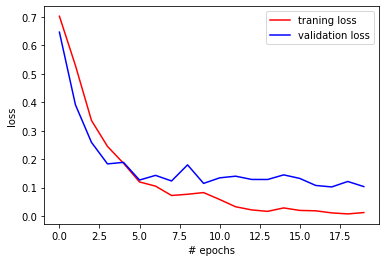

In [7]:
from matplotlib import pyplot as plt
#plot the training loss and validation loss 
plt.plot(history.history['loss'],'r',label='traning loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

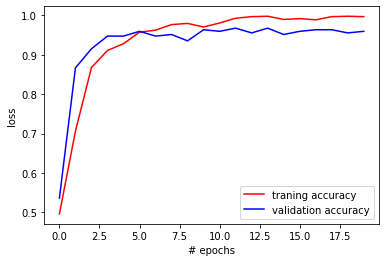

In [8]:
# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'],'r',label='traning accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))


138/138 [==============================] - 3s 24ms/step
[0.19506670453626176, 0.9492753744125366]
